Load the wav files (twilio_call_unfiltered and twilio_call_filtered).

/var/folders/my/fbxktbx57hj75wdxyw_b2vjw0000gn/T/ipykernel_8612/2594089057.py:12: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_unfiltered = np.fromstring(signal_unfiltered, np.int16)
/var/folders/my/fbxktbx57hj75wdxyw_b2vjw0000gn/T/ipykernel_8612/2594089057.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_filtered = np.fromstring(signal_filtered, np.int16)


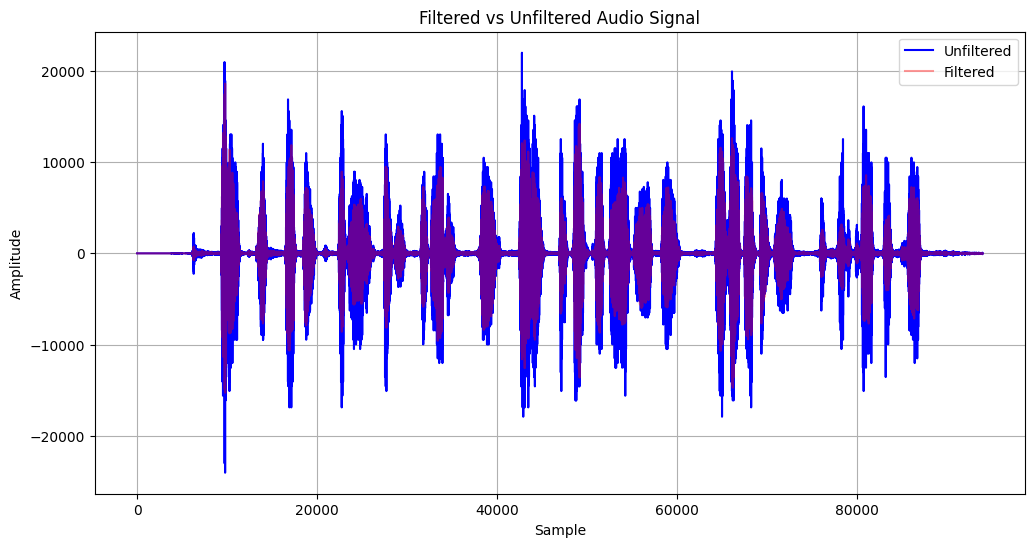

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

# Open both wav files
unfiltered = wave.open("twilio_call_unfiltered.wav", "r")
filtered = wave.open("twilio_call_filtered.wav", "r")

# Extract unfiltered audio
signal_unfiltered = unfiltered.readframes(-1)
signal_unfiltered = np.fromstring(signal_unfiltered, np.int16)

# Extract filtered audio
signal_filtered = filtered.readframes(-1)
signal_filtered = np.fromstring(signal_filtered, np.int16)

# Check if mono
if unfiltered.getnchannels() == 2 or filtered.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

# Create single figure with both signals
plt.figure(figsize=(12, 6))
plt.title("Filtered vs Unfiltered Audio Signal")

# Plot unfiltered signal in blue
plt.plot(signal_unfiltered, color='blue', label='Unfiltered', alpha=1.0)

# Plot filtered signal in red with transparency
plt.plot(signal_filtered, color='red', label='Filtered', alpha=0.4)

plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Close the files
unfiltered.close()
filtered.close()

/var/folders/my/fbxktbx57hj75wdxyw_b2vjw0000gn/T/ipykernel_8612/1503827108.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_unfiltered = np.fromstring(signal_unfiltered, np.int16)
/var/folders/my/fbxktbx57hj75wdxyw_b2vjw0000gn/T/ipykernel_8612/1503827108.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  signal_filtered = np.fromstring(signal_filtered, np.int16)


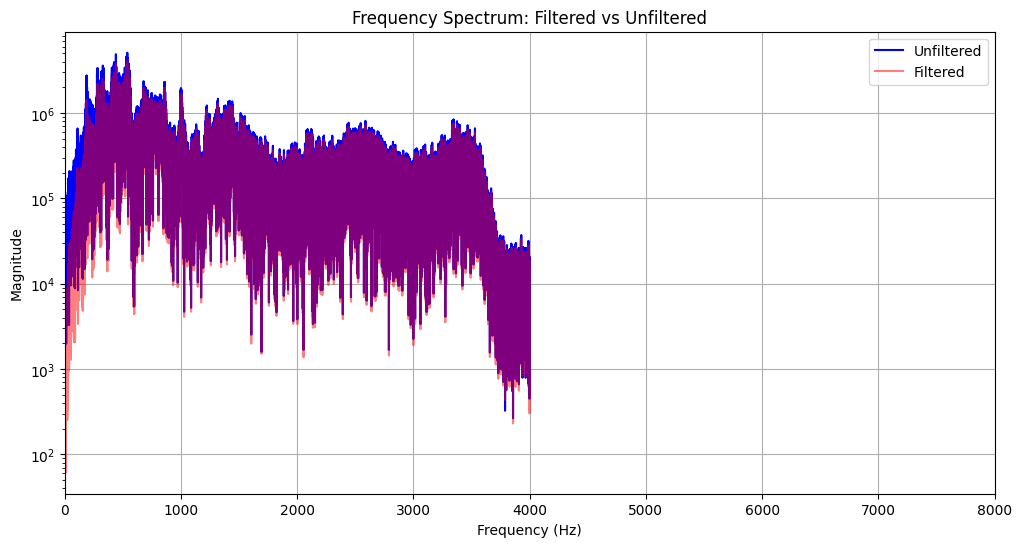

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

# Open both wav files
unfiltered = wave.open("twilio_call_unfiltered.wav", "r")
filtered = wave.open("twilio_call_filtered.wav", "r")

# Get sample rate (needed for frequency calculation)
framerate_unfiltered = unfiltered.getframerate()

# Extract audio signals
signal_unfiltered = unfiltered.readframes(-1)
signal_unfiltered = np.fromstring(signal_unfiltered, np.int16)
signal_filtered = filtered.readframes(-1)
signal_filtered = np.fromstring(signal_filtered, np.int16)

# Check if mono
if unfiltered.getnchannels() == 2 or filtered.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)

# Compute FFT and frequency axis
def get_fft(signal, framerate):
    # Compute FFT
    fft = np.fft.fft(signal)
    # Get magnitude spectrum
    magnitude = np.abs(fft)
    # Create frequency axis
    freq = np.fft.fftfreq(len(signal), 1/framerate)
    # Only take first half (positive frequencies)
    return freq[:len(freq)//2], magnitude[:len(freq)//2]

# Get frequency spectra
freq_unfiltered, mag_unfiltered = get_fft(signal_unfiltered, framerate_unfiltered)
freq_filtered, mag_filtered = get_fft(signal_filtered, framerate_unfiltered)

# Plot frequency spectrum
plt.figure(figsize=(12, 6))
plt.title("Frequency Spectrum: Filtered vs Unfiltered")

# Plot both spectra (using log scale for better visualization)
plt.semilogy(freq_unfiltered, mag_unfiltered, color='blue', label='Unfiltered', alpha=1.0)
plt.semilogy(freq_filtered, mag_filtered, color='red', label='Filtered', alpha=0.5)

plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

# Limit x-axis to audible frequencies (or adjust as needed)
plt.xlim(0, 8000)  # Adjust this value based on your interests

plt.show()

# Close the files
unfiltered.close()
filtered.close()